In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.special import erfc

Define a datamodel

In [7]:
d = 1000

In [10]:
protect_robust_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(5, int(d/2)),(0.2, int(d/2))]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(2, int(d/2)),(1, int(d/2))]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
}

protect_robust_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=protect_robust_kwargs,
    name="protect-robust"
)

uniform_defence_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(5, int(d/2)),(0.2, int(d/2))]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(2, int(d/2)),(1, int(d/2))]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
}

uniform_defence_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=uniform_defence_kwargs,
    name="uniform_defence"
)

protect_non_robust_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(5, int(d/2)),(0.2, int(d/2))]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(2, int(d/2))]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
}

protect_non_robust_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=protect_non_robust_kwargs,
    name="protect-non-robust"
)



Define an experiment

In [31]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=1,
    alphas=np.logspace(-0.2,2,10),
    epsilons=np.array([0.0, 0.1, 0.2, 0.3]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = [protect_robust_datamodel, uniform_defence_datamodel, protect_non_robust_datamodel],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.Logistic,
    gamma_fair_error=0.01,
    name="defence_sweep"
)
experiment_json = experiment.to_json()

In [32]:
with open("defence_sweep.json", "w") as f:
    f.write(experiment_json)

In [33]:
command = ["pwd"]
subprocess.run(command)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS


CompletedProcess(args=['pwd'], returncode=0)

In [34]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment defence_sweep
INFO:root:Starting Experiment defence_sweep
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 2
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 3
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 4
  0%|          | 0/240 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 1
INFO:root:Initializing data model
INFO:root:Starting task 2
INFO:root:Initializing data model
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Starting task 4
INFO:root:Initializing data model


2025-02-22 17:44:44,732 - Rank 0 - INFO - The MPI comm size is 5
2025-02-22 17:44:44,732 - Rank 0 - INFO - This process has rank 0
2025-02-22 17:44:44,732 - Rank 0 - INFO - Starting Master for experiment defence_sweep
2025-02-22 17:44:44,732 - Rank 0 - INFO - Starting Experiment defence_sweep
2025-02-22 17:44:44,742 - Rank 0 - INFO - Starting all processes
2025-02-22 17:44:44,742 - Rank 0 - INFO - Sending task 0 to 1
2025-02-22 17:44:44,742 - Rank 0 - INFO - Sending task 1 to 2
2025-02-22 17:44:44,742 - Rank 0 - INFO - Sending task 2 to 3
2025-02-22 17:44:44,742 - Rank 0 - INFO - Sending task 3 to 4
2025-02-22 17:44:44,743 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-02-22 17:44:44,743 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. .

2025-02-22 17:44:53,753 - Rank 0 - INFO - Received task 2 from 2
2025-02-22 17:44:53,754 - Rank 0 - INFO - Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e5b50>)
2025-02-22 17:44:53,755 - Rank 0 - INFO - Received the 1th task


INFO:root:Finished State Evolution Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 4 from 4
INFO:root:Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=Tru

2025-02-22 17:44:54,052 - Rank 0 - INFO - Received task 4 from 4
2025-02-22 17:44:54,052 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e6290>)
2025-02-22 17:44:54,053 - Rank 0 - INFO - Received the 2th task
2025-02-22 17:44:54,230 - Rank 0 - INFO - Received task 3 f

INFO:root:Received task 3 from 3
INFO:root:Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e69d0>)
  1%|▏         | 3/240 [00:09<08:39,  2.19s/it]INFO:root:Received the 3th task
INFO:root:Starting task 7
INFO:root:Initializing data model
INFO:root:Received task 1 from 1
INFO:root:S

2025-02-22 17:44:54,546 - Rank 0 - INFO - Received task 1 from 1
2025-02-22 17:44:54,546 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e6e90>)
2025-02-22 17:44:54,551 - Rank 0 - INFO - Received the 4th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1

2025-02-22 17:45:03,078 - Rank 0 - INFO - Received task 5 from 2
2025-02-22 17:45:03,079 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7410>)
2025-02-22 17:45:03,080 - Rank 0 - INFO - Received the 5th task


INFO:root:Finished State Evolution Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 6 from 4
INFO:root:Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=Tru

2025-02-22 17:45:03,649 - Rank 0 - INFO - Received task 6 from 4
2025-02-22 17:45:03,649 - Rank 0 - INFO - Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7890>)
2025-02-22 17:45:03,651 - Rank 0 - INFO - Received the 6th task


INFO:root:Finished State Evolution Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 7 from 3
INFO:root:Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=Tr

2025-02-22 17:45:03,970 - Rank 0 - INFO - Received task 7 from 3
2025-02-22 17:45:03,970 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7d10>)
2025-02-22 17:45:03,971 - Rank 0 - INFO - Received the 7th task
2025-02-22 17:45:03,983 - Rank 0 - INFO - Received task 8 f

INFO:root:Starting task 11
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.    

2025-02-22 17:45:13,684 - Rank 0 - INFO - Received task 9 from 2
2025-02-22 17:45:13,684 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f0a10>)
2025-02-22 17:45:13,689 - Rank 0 - INFO - Received the 9th task


INFO:root:Finished State Evolution Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_mode

2025-02-22 17:45:14,980 - Rank 0 - INFO - Received task 10 from 4
2025-02-22 17:45:14,980 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f0ed0>)
2025-02-22 17:45:14,981 - Rank 0 - INFO - Received the 10th task


INFO:root:Received task 12 from 1
INFO:root:Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f1410>)
  5%|▍         | 11/240 [00:30<08:10,  2.14s/it]INFO:root:Received the 11th task
INFO:root:Starting task 15
INFO:root:Initializing data model


2025-02-22 17:45:15,184 - Rank 0 - INFO - Received task 12 from 1
2025-02-22 17:45:15,184 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f1410>)
2025-02-22 17:45:15,185 - Rank 0 - INFO - Received the 11th task


INFO:root:Finished State Evolution Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 11 from 3
INFO:root:Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:45:15,827 - Rank 0 - INFO - Received task 11 from 3
2025-02-22 17:45:15,827 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f18d0>)
2025-02-22 17:45:15,828 - Rank 0 - INFO - Received the 12th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:45:19,739 - Rank 0 - INFO - Received task 13 from 2
2025-02-22 17:45:19,739 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f1f10>)
2025-02-22 17:45:19,740 - Rank 0 - INFO - Received the 13th task


INFO:root:Finished State Evolution Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1

2025-02-22 17:45:20,486 - Rank 0 - INFO - Received task 14 from 4
2025-02-22 17:45:20,486 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f23d0>)
2025-02-22 17:45:20,487 - Rank 0 - INFO - Received the 14th task


INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.

2025-02-22 17:45:21,497 - Rank 0 - INFO - Received task 15 from 1
2025-02-22 17:45:21,497 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f2a10>)
2025-02-22 17:45:21,499 - Rank 0 - INFO - Received the 15th task


INFO:root:Finished State Evolution Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 16 from 3
INFO:root:Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=Tr

2025-02-22 17:45:22,941 - Rank 0 - INFO - Received task 16 from 3
2025-02-22 17:45:22,941 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f2ed0>)
2025-02-22 17:45:22,942 - Rank 0 - INFO - Received the 16th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:45:26,915 - Rank 0 - INFO - Received task 18 from 4
2025-02-22 17:45:26,915 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f3650>)
2025-02-22 17:45:26,916 - Rank 0 - INFO - Received the 17th task


INFO:root:Finished State Evolution Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 17 from 2
INFO:root:Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=T

2025-02-22 17:45:27,213 - Rank 0 - INFO - Received task 17 from 2
2025-02-22 17:45:27,213 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f38d0>)
2025-02-22 17:45:27,214 - Rank 0 - INFO - Received the 18th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:45:29,234 - Rank 0 - INFO - Received task 19 from 1
2025-02-22 17:45:29,234 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f3d50>)
2025-02-22 17:45:29,236 - Rank 0 - INFO - Received the 19th task


INFO:root:Finished State Evolution Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 20 from 3
INFO:root:Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=T

2025-02-22 17:45:30,935 - Rank 0 - INFO - Received task 20 from 3
2025-02-22 17:45:30,935 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c5046d0>)
2025-02-22 17:45:30,936 - Rank 0 - INFO - Received the 20th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:45:33,898 - Rank 0 - INFO - Received task 21 from 4
2025-02-22 17:45:33,898 - Rank 0 - INFO - Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c504950>)
2025-02-22 17:45:33,899 - Rank 0 - INFO - Received the 21th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:45:34,711 - Rank 0 - INFO - Received task 22 from 2
2025-02-22 17:45:34,712 - Rank 0 - INFO - Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c504e50>)
2025-02-22 17:45:34,713 - Rank 0 - INFO - Received the 22th task


INFO:root:Finished State Evolution Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 23 from 1
INFO:root:Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=T

2025-02-22 17:45:35,967 - Rank 0 - INFO - Received task 23 from 1
2025-02-22 17:45:35,967 - Rank 0 - INFO - Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c505590>)
2025-02-22 17:45:35,968 - Rank 0 - INFO - Received the 23th task


INFO:root:Finished State Evolution Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 24 from 3
INFO:root:Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrice

2025-02-22 17:45:37,252 - Rank 0 - INFO - Received task 24 from 3
2025-02-22 17:45:37,252 - Rank 0 - INFO - Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c505950>)
2025-02-22 17:45:37,253 - Rank 0 - INFO - Received the 24th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:45:41,286 - Rank 0 - INFO - Received task 25 from 4
2025-02-22 17:45:41,286 - Rank 0 - INFO - Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c505bd0>)
2025-02-22 17:45:41,288 - Rank 0 - INFO - Received the 25th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:45:42,456 - Rank 0 - INFO - Received task 26 from 2
2025-02-22 17:45:42,456 - Rank 0 - INFO - Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c505f50>)
2025-02-22 17:45:42,457 - Rank 0 - INFO - Received the 26th task


INFO:root:Finished State Evolution Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 27 from 1
INFO:root:Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:45:42,974 - Rank 0 - INFO - Received task 27 from 1
2025-02-22 17:45:42,975 - Rank 0 - INFO - Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e63d0>)
2025-02-22 17:45:42,991 - Rank 0 - INFO - Received the 27th task


INFO:root:Finished State Evolution Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 28 from 3
INFO:root:Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=

2025-02-22 17:45:45,093 - Rank 0 - INFO - Received task 28 from 3
2025-02-22 17:45:45,094 - Rank 0 - INFO - Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e46d0>)
2025-02-22 17:45:45,095 - Rank 0 - INFO - Received the 28th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:45:49,110 - Rank 0 - INFO - Received task 29 from 4
2025-02-22 17:45:49,110 - Rank 0 - INFO - Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c505290>)
2025-02-22 17:45:49,111 - Rank 0 - INFO - Received the 29th task


INFO:root:Starting task 33
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.    

2025-02-22 17:45:50,435 - Rank 0 - INFO - Received task 30 from 2
2025-02-22 17:45:50,435 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7110>)
2025-02-22 17:45:50,436 - Rank 0 - INFO - Received the 30th task


INFO:root:Finished State Evolution Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 31 from 1
INFO:root:Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=

2025-02-22 17:45:51,671 - Rank 0 - INFO - Received task 31 from 1
2025-02-22 17:45:51,671 - Rank 0 - INFO - Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c507450>)
2025-02-22 17:45:51,672 - Rank 0 - INFO - Received the 31th task


INFO:root:Finished State Evolution Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 32 from 3
INFO:root:Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:45:52,820 - Rank 0 - INFO - Received task 32 from 3
2025-02-22 17:45:52,820 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c507a10>)
2025-02-22 17:45:52,832 - Rank 0 - INFO - Received the 32th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:45:56,267 - Rank 0 - INFO - Received task 33 from 4
2025-02-22 17:45:56,268 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c506a90>)
2025-02-22 17:45:56,269 - Rank 0 - INFO - Received the 33th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:45:58,417 - Rank 0 - INFO - Received task 34 from 2
2025-02-22 17:45:58,417 - Rank 0 - INFO - Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7d50>)
2025-02-22 17:45:58,419 - Rank 0 - INFO - Received the 34th task


INFO:root:Finished State Evolution Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 35 from 1
INFO:root:Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:45:59,232 - Rank 0 - INFO - Received task 35 from 1
2025-02-22 17:45:59,232 - Rank 0 - INFO - Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c5208d0>)
2025-02-22 17:45:59,233 - Rank 0 - INFO - Received the 35th task


INFO:root:Finished State Evolution Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_

2025-02-22 17:46:01,810 - Rank 0 - INFO - Received task 36 from 3
2025-02-22 17:46:01,810 - Rank 0 - INFO - Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c1d8c90>)
2025-02-22 17:46:01,811 - Rank 0 - INFO - Received the 36th task


INFO:root:Finished State Evolution Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1

2025-02-22 17:46:04,343 - Rank 0 - INFO - Received task 37 from 4
2025-02-22 17:46:04,343 - Rank 0 - INFO - Saved Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f0f10>)
2025-02-22 17:46:04,344 - Rank 0 - INFO - Received the 37th task


INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.

2025-02-22 17:46:06,757 - Rank 0 - INFO - Received task 38 from 2
2025-02-22 17:46:06,757 - Rank 0 - INFO - Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f1450>)
2025-02-22 17:46:06,758 - Rank 0 - INFO - Received the 38th task


INFO:root:Received task 38 from 2
INFO:root:Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f1450>)
 16%|█▌        | 38/240 [01:22<07:32,  2.24s/it]INFO:root:Received the 38th task
INFO:root:Starting task 42
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id

2025-02-22 17:46:07,324 - Rank 0 - INFO - Received task 39 from 1
2025-02-22 17:46:07,324 - Rank 0 - INFO - Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c521690>)
2025-02-22 17:46:07,325 - Rank 0 - INFO - Received the 39th task


INFO:root:Starting task 43
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.    

2025-02-22 17:46:09,712 - Rank 0 - INFO - Received task 40 from 3
2025-02-22 17:46:09,712 - Rank 0 - INFO - Saved Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c521a90>)
2025-02-22 17:46:09,713 - Rank 0 - INFO - Received the 40th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. .

2025-02-22 17:46:12,090 - Rank 0 - INFO - Received task 41 from 4
2025-02-22 17:46:12,090 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f1f10>)
2025-02-22 17:46:12,095 - Rank 0 - INFO - Received the 41th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:46:13,515 - Rank 0 - INFO - Received task 42 from 2
2025-02-22 17:46:13,515 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f2410>)
2025-02-22 17:46:13,520 - Rank 0 - INFO - Received the 42th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:46:16,030 - Rank 0 - INFO - Received task 43 from 1
2025-02-22 17:46:16,030 - Rank 0 - INFO - Saved Task(id=43, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c522950>)
2025-02-22 17:46:16,032 - Rank 0 - INFO - Received the 43th task


INFO:root:Received task 43 from 1
INFO:root:Saved Task(id=43, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c522950>)
 18%|█▊        | 43/240 [01:31<06:47,  2.07s/it]INFO:root:Received the 43th task
INFO:root:Starting task 47
INFO:root:Initializing data model
INFO:root:Σ_x value counts: (array([0.     

2025-02-22 17:46:16,497 - Rank 0 - INFO - Received task 44 from 3
2025-02-22 17:46:16,497 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f2ad0>)
2025-02-22 17:46:16,499 - Rank 0 - INFO - Received the 44th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:46:18,482 - Rank 0 - INFO - Received task 45 from 4
2025-02-22 17:46:18,482 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c523290>)
2025-02-22 17:46:18,486 - Rank 0 - INFO - Received the 45th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.        

2025-02-22 17:46:19,839 - Rank 0 - INFO - Received task 46 from 2
2025-02-22 17:46:19,839 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c5233d0>)
2025-02-22 17:46:19,841 - Rank 0 - INFO - Received the 46th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Finished State Evolution Task(id=47, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 

2025-02-22 17:46:21,800 - Rank 0 - INFO - Received task 47 from 1
2025-02-22 17:46:21,801 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c523a10>)
2025-02-22 17:46:21,807 - Rank 0 - INFO - Received the 47th task


INFO:root:Starting task 51
INFO:root:Initializing data model
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.

2025-02-22 17:46:24,441 - Rank 0 - INFO - Received task 48 from 3
2025-02-22 17:46:24,441 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c523c90>)
2025-02-22 17:46:24,443 - Rank 0 - INFO - Received the 48th task


INFO:root:Received task 49 from 4
INFO:root:Saved Task(id=49, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c507e10>)
 20%|██        | 49/240 [01:40<04:53,  1.54s/it]INFO:root:Received the 49th task
INFO:root:Starting task 53
INFO:root:Initializing data model


2025-02-22 17:46:24,924 - Rank 0 - INFO - Received task 49 from 4
2025-02-22 17:46:24,924 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c507e10>)
2025-02-22 17:46:24,925 - Rank 0 - INFO - Received the 49th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:46:26,181 - Rank 0 - INFO - Received task 50 from 2
2025-02-22 17:46:26,181 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c5346d0>)
2025-02-22 17:46:26,183 - Rank 0 - INFO - Received the 50th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:46:29,259 - Rank 0 - INFO - Received task 51 from 1
2025-02-22 17:46:29,259 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e4b90>)
2025-02-22 17:46:29,261 - Rank 0 - INFO - Received the 51th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:46:33,054 - Rank 0 - INFO - Received task 52 from 3
2025-02-22 17:46:33,055 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c504e90>)
2025-02-22 17:46:33,059 - Rank 0 - INFO - Received the 52th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:46:33,753 - Rank 0 - INFO - Received task 53 from 4
2025-02-22 17:46:33,753 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c535190>)
2025-02-22 17:46:33,755 - Rank 0 - INFO - Received the 53th task


INFO:root:Finished State Evolution Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 54 from 2
INFO:root:Saved Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrice

2025-02-22 17:46:36,107 - Rank 0 - INFO - Received task 54 from 2
2025-02-22 17:46:36,107 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c535610>)
2025-02-22 17:46:36,109 - Rank 0 - INFO - Received the 54th task


INFO:root:iter_nb: 500, err: 4.239472021083657e-05
INFO:root:error: 4.239472021083657e-05
INFO:root:Finished State Evolution Task(id=55, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 55 from 1
INFO:root:Saved Task(id=55, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsil

2025-02-22 17:46:41,132 - Rank 0 - INFO - Received task 55 from 1
2025-02-22 17:46:41,132 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c535950>)
2025-02-22 17:46:41,135 - Rank 0 - INFO - Received the 55th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:46:45,898 - Rank 0 - INFO - Received task 58 from 2
2025-02-22 17:46:45,899 - Rank 0 - INFO - Saved Task(id=58, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c535a90>)
2025-02-22 17:46:45,901 - Rank 0 - INFO - Received the 56th task


INFO:root:Finished State Evolution Task(id=56, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 56 from 3
INFO:root:Saved Task(id=56, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=T

2025-02-22 17:46:48,173 - Rank 0 - INFO - Received task 56 from 3
2025-02-22 17:46:48,173 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c535e10>)
2025-02-22 17:46:48,175 - Rank 0 - INFO - Received the 57th task


INFO:root:Finished State Evolution Task(id=59, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=57, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model

2025-02-22 17:46:48,888 - Rank 0 - INFO - Received task 59 from 1
2025-02-22 17:46:48,888 - Rank 0 - INFO - Saved Task(id=59, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c5364d0>)
2025-02-22 17:46:48,890 - Rank 0 - INFO - Received the 58th task


INFO:root:Received task 57 from 4
INFO:root:Saved Task(id=57, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c536650>)
 25%|██▍       | 59/240 [02:04<05:36,  1.86s/it]INFO:root:Received the 59th task
INFO:root:Starting task 63
INFO:root:Initializing data model


2025-02-22 17:46:49,469 - Rank 0 - INFO - Received task 57 from 4
2025-02-22 17:46:49,469 - Rank 0 - INFO - Saved Task(id=57, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c536650>)
2025-02-22 17:46:49,470 - Rank 0 - INFO - Received the 59th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:46:56,172 - Rank 0 - INFO - Received task 60 from 2
2025-02-22 17:46:56,172 - Rank 0 - INFO - Saved Task(id=60, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e6c90>)
2025-02-22 17:46:56,174 - Rank 0 - INFO - Received the 60th task


INFO:root:Finished State Evolution Task(id=61, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 61 from 3
INFO:root:Saved Task(id=61, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=

2025-02-22 17:46:58,119 - Rank 0 - INFO - Received task 61 from 3
2025-02-22 17:46:58,119 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16b2e7010>)
2025-02-22 17:46:58,120 - Rank 0 - INFO - Received the 61th task


INFO:root:Finished State Evolution Task(id=62, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 62 from 1
INFO:root:Saved Task(id=62, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:46:58,616 - Rank 0 - INFO - Received task 62 from 1
2025-02-22 17:46:58,616 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e71d0>)
2025-02-22 17:46:58,617 - Rank 0 - INFO - Received the 62th task
2025-02-22 17:46:59,042 - Rank 0 - INFO - Received task

INFO:root:Received task 63 from 4
INFO:root:Saved Task(id=63, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c537590>)
 26%|██▋       | 63/240 [02:14<04:52,  1.65s/it]INFO:root:Received the 63th task
INFO:root:Starting task 67
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_m

2025-02-22 17:47:06,453 - Rank 0 - INFO - Received task 67 from 4
2025-02-22 17:47:06,453 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7c10>)
2025-02-22 17:47:06,454 - Rank 0 - INFO - Received the 64th task


INFO:root:Finished State Evolution Task(id=64, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 64 from 2
INFO:root:Saved Task(id=64, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=

2025-02-22 17:47:08,106 - Rank 0 - INFO - Received task 64 from 2
2025-02-22 17:47:08,107 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7e90>)
2025-02-22 17:47:08,122 - Rank 0 - INFO - Received the 65th task


INFO:root:iter_nb: 1000, err: 1.2579029203152459e-05
INFO:root:error: 1.2579029203152459e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ

2025-02-22 17:47:10,281 - Rank 0 - INFO - Received task 65 from 3
2025-02-22 17:47:10,281 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7b50>)
2025-02-22 17:47:10,283 - Rank 0 - INFO - Received the 66th task


INFO:root:Finished State Evolution Task(id=66, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 66 from 1
INFO:root:Saved Task(id=66, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:47:11,396 - Rank 0 - INFO - Received task 66 from 1
2025-02-22 17:47:11,396 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c523c10>)
2025-02-22 17:47:11,397 - Rank 0 - INFO - Received the 67th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:47:15,832 - Rank 0 - INFO - Received task 68 from 4
2025-02-22 17:47:15,832 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c504a10>)
2025-02-22 17:47:15,833 - Rank 0 - INFO - Received the 68th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:47:19,456 - Rank 0 - INFO - Received task 70 from 3
2025-02-22 17:47:19,456 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e4dd0>)
2025-02-22 17:47:19,457 - Rank 0 - INFO - Received the 69th task


INFO:root:Finished State Evolution Task(id=69, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 69 from 2
INFO:root:Saved Task(id=69, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:47:20,597 - Rank 0 - INFO - Received task 69 from 2
2025-02-22 17:47:20,597 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c504a50>)
2025-02-22 17:47:20,598 - Rank 0 - INFO - Received the 70th task


INFO:root:Finished State Evolution Task(id=71, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 71 from 1
INFO:root:Saved Task(id=71, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:47:22,061 - Rank 0 - INFO - Received task 71 from 1
2025-02-22 17:47:22,061 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e53d0>)
2025-02-22 17:47:22,062 - Rank 0 - INFO - Received the 71th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:47:27,364 - Rank 0 - INFO - Received task 72 from 4
2025-02-22 17:47:27,364 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d365790>)
2025-02-22 17:47:27,365 - Rank 0 - INFO - Received the 72th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:47:33,154 - Rank 0 - INFO - Received task 73 from 3
2025-02-22 17:47:33,155 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c535bd0>)
2025-02-22 17:47:33,156 - Rank 0 - INFO - Received the 73th task


INFO:root:Finished State Evolution Task(id=74, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 74 from 2
INFO:root:Saved Task(id=74, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:47:33,627 - Rank 0 - INFO - Received task 74 from 2
2025-02-22 17:47:33,627 - Rank 0 - INFO - Saved Task(id=74, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d365d90>)
2025-02-22 17:47:33,628 - Rank 0 - INFO - Received the 74th task


INFO:root:Finished State Evolution Task(id=75, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 75 from 1
INFO:root:Saved Task(id=75, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:47:35,153 - Rank 0 - INFO - Received task 75 from 1
2025-02-22 17:47:35,153 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e5850>)
2025-02-22 17:47:35,154 - Rank 0 - INFO - Received the 75th task


INFO:root:iter_nb: 1000, err: 2.5283895467964612e-05
INFO:root:error: 2.5283895467964612e-05
INFO:root:Finished State Evolution Task(id=76, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 76 from 4
INFO:root:Saved Task(id=76, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_

2025-02-22 17:47:39,328 - Rank 0 - INFO - Received task 76 from 4
2025-02-22 17:47:39,328 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c506450>)
2025-02-22 17:47:39,375 - Rank 0 - INFO - Received the 76th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:47:44,818 - Rank 0 - INFO - Received task 79 from 1
2025-02-22 17:47:44,818 - Rank 0 - INFO - Saved Task(id=79, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c506a90>)
2025-02-22 17:47:44,832 - Rank 0 - INFO - Received the 77th task


INFO:root:iter_nb: 1000, err: 2.5283895467964612e-05
INFO:root:error: 2.5283895467964612e-05
INFO:root:Finished State Evolution Task(id=80, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:iter_nb: 1000, err: 3.472522868719352e-05
INFO:root:error: 3.472522868719352e-05
INFO:root:Received task 80 from 4
INFO:root:Saved Task(id=80, task_type=<

2025-02-22 17:47:46,284 - Rank 0 - INFO - Received task 80 from 4
2025-02-22 17:47:46,284 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d366bd0>)
2025-02-22 17:47:46,285 - Rank 0 - INFO - Received the 78th task


INFO:root:Finished State Evolution Task(id=77, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 77 from 3
INFO:root:Saved Task(id=77, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:47:48,019 - Rank 0 - INFO - Received task 77 from 3
2025-02-22 17:47:48,019 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d3670d0>)
2025-02-22 17:47:48,020 - Rank 0 - INFO - Received the 79th task


INFO:root:Finished State Evolution Task(id=78, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 78 from 2
INFO:root:Saved Task(id=78, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:47:49,274 - Rank 0 - INFO - Received task 78 from 2
2025-02-22 17:47:49,274 - Rank 0 - INFO - Saved Task(id=78, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d365850>)
2025-02-22 17:47:49,290 - Rank 0 - INFO - Received the 80th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:47:56,736 - Rank 0 - INFO - Received task 81 from 1
2025-02-22 17:47:56,737 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7910>)
2025-02-22 17:47:56,738 - Rank 0 - INFO - Received the 81th task


INFO:root:Received task 82 from 4
INFO:root:Saved Task(id=82, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d367b50>)
 34%|███▍      | 82/240 [03:12<07:17,  2.77s/it]INFO:root:Received the 82th task
INFO:root:Starting task 86
INFO:root:Initializing data model


2025-02-22 17:47:57,095 - Rank 0 - INFO - Received task 82 from 4
2025-02-22 17:47:57,095 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d367b50>)
2025-02-22 17:47:57,096 - Rank 0 - INFO - Received the 82th task


INFO:root:Finished State Evolution Task(id=83, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 83 from 3
INFO:root:Saved Task(id=83, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:47:58,402 - Rank 0 - INFO - Received task 83 from 3
2025-02-22 17:47:58,402 - Rank 0 - INFO - Saved Task(id=83, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7f90>)
2025-02-22 17:47:58,403 - Rank 0 - INFO - Received the 83th task


INFO:root:Finished State Evolution Task(id=84, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 84 from 2
INFO:root:Saved Task(id=84, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:48:00,583 - Rank 0 - INFO - Received task 84 from 2
2025-02-22 17:48:00,583 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d366f90>)
2025-02-22 17:48:00,599 - Rank 0 - INFO - Received the 84th task


INFO:root:Starting task 88
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.    

2025-02-22 17:48:10,855 - Rank 0 - INFO - Received task 88 from 2
2025-02-22 17:48:10,855 - Rank 0 - INFO - Saved Task(id=88, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c506bd0>)
2025-02-22 17:48:10,857 - Rank 0 - INFO - Received the 85th task


INFO:root:Finished State Evolution Task(id=85, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=86, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_mode

2025-02-22 17:48:11,639 - Rank 0 - INFO - Received task 85 from 1
2025-02-22 17:48:11,639 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c534b90>)
2025-02-22 17:48:11,641 - Rank 0 - INFO - Received the 86th task


INFO:root:Received task 86 from 4
INFO:root:Saved Task(id=86, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37cd50>)
 36%|███▋      | 87/240 [03:27<06:31,  2.56s/it]INFO:root:Received the 87th task
INFO:root:Starting task 91
INFO:root:Initializing data model


2025-02-22 17:48:11,983 - Rank 0 - INFO - Received task 86 from 4
2025-02-22 17:48:11,983 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37cd50>)
2025-02-22 17:48:12,016 - Rank 0 - INFO - Received the 87th task


INFO:root:Finished State Evolution Task(id=87, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 87 from 3
INFO:root:Saved Task(id=87, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:48:13,435 - Rank 0 - INFO - Received task 87 from 3
2025-02-22 17:48:13,435 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c504f10>)
2025-02-22 17:48:13,436 - Rank 0 - INFO - Received the 88th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:48:21,943 - Rank 0 - INFO - Received task 91 from 4
2025-02-22 17:48:21,943 - Rank 0 - INFO - Saved Task(id=91, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37d4d0>)
2025-02-22 17:48:21,944 - Rank 0 - INFO - Received the 89th task


INFO:root:Finished State Evolution Task(id=92, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 92 from 3
INFO:root:Saved Task(id=92, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices

2025-02-22 17:48:23,472 - Rank 0 - INFO - Received task 92 from 3
2025-02-22 17:48:23,472 - Rank 0 - INFO - Saved Task(id=92, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e5ad0>)
2025-02-22 17:48:23,473 - Rank 0 - INFO - Received the 90th task


INFO:root:iter_nb: 1000, err: 2.681296481910067e-05
INFO:root:error: 2.681296481910067e-05
INFO:root:iter_nb: 1000, err: 3.3939035915864224e-05
INFO:root:error: 3.3939035915864224e-05
INFO:root:Finished State Evolution Task(id=89, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 89 from 2
INFO:root:Saved Task(id=89, task_type=<

2025-02-22 17:48:27,726 - Rank 0 - INFO - Received task 89 from 2
2025-02-22 17:48:27,727 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d365c10>)
2025-02-22 17:48:27,728 - Rank 0 - INFO - Received the 91th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Finished State Evolution Task(id=90, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Norm Σ_x: 1000.0
INFO:root:Received task 90 from 1
INFO:root:Saved Task(id=90, task_type=<TaskType.

2025-02-22 17:48:28,219 - Rank 0 - INFO - Received task 90 from 1
2025-02-22 17:48:28,219 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37e150>)
2025-02-22 17:48:28,221 - Rank 0 - INFO - Received the 92th task


INFO:root:Starting task 96
INFO:root:Initializing data model
INFO:root:Σ_x value counts: (array([0.        , 0.07692308, 1.92307692]), array([999000,    500,    500]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.

2025-02-22 17:48:33,762 - Rank 0 - INFO - Received task 93 from 4
2025-02-22 17:48:33,763 - Rank 0 - INFO - Saved Task(id=93, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37cd50>)
2025-02-22 17:48:33,764 - Rank 0 - INFO - Received the 93th task


INFO:root:Received task 94 from 3
INFO:root:Saved Task(id=94, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37e890>)
 39%|███▉      | 94/240 [03:49<06:17,  2.59s/it]INFO:root:Received the 94th task
INFO:root:Starting task 98
INFO:root:Initializing data model


2025-02-22 17:48:34,127 - Rank 0 - INFO - Received task 94 from 3
2025-02-22 17:48:34,127 - Rank 0 - INFO - Saved Task(id=94, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37e890>)
2025-02-22 17:48:34,129 - Rank 0 - INFO - Received the 94th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:48:38,019 - Rank 0 - INFO - Received task 95 from 2
2025-02-22 17:48:38,019 - Rank 0 - INFO - Saved Task(id=95, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37e990>)
2025-02-22 17:48:38,020 - Rank 0 - INFO - Received the 95th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:48:39,609 - Rank 0 - INFO - Received task 96 from 1
2025-02-22 17:48:39,610 - Rank 0 - INFO - Saved Task(id=96, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c507110>)
2025-02-22 17:48:39,611 - Rank 0 - INFO - Received the 96th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:48:47,481 - Rank 0 - INFO - Received task 100 from 1
2025-02-22 17:48:47,482 - Rank 0 - INFO - Saved Task(id=100, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17258eb90>)
2025-02-22 17:48:47,483 - Rank 0 - INFO - Received the 97th task


INFO:root:Starting task 101
INFO:root:Initializing data model
INFO:root:iter_nb: 2500, err: 1.0310165293958562e-05
INFO:root:error: 1.0310165293958562e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Finished State Evolution Task(id=97, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gam

2025-02-22 17:48:49,457 - Rank 0 - INFO - Received task 97 from 4
2025-02-22 17:48:49,460 - Rank 0 - INFO - Saved Task(id=97, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d367690>)
2025-02-22 17:48:49,467 - Rank 0 - INFO - Received the 98th task


INFO:root:Received the 98th task
INFO:root:Starting task 102
INFO:root:Initializing data model
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.333333

2025-02-22 17:48:50,910 - Rank 0 - INFO - Received task 98 from 3
2025-02-22 17:48:50,911 - Rank 0 - INFO - Saved Task(id=98, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c507a50>)
2025-02-22 17:48:50,912 - Rank 0 - INFO - Received the 99th task


INFO:root:iter_nb: 500, err: 0.007142425370915362
INFO:root:error: 0.007142425370915362
INFO:root:iter_nb: 2500, err: 1.0310165293958562e-05
INFO:root:error: 1.0310165293958562e-05
INFO:root:Finished State Evolution Task(id=99, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizin

2025-02-22 17:48:54,876 - Rank 0 - INFO - Received task 99 from 2
2025-02-22 17:48:54,876 - Rank 0 - INFO - Saved Task(id=99, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7e10>)
2025-02-22 17:48:54,877 - Rank 0 - INFO - Received the 100th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:48:57,865 - Rank 0 - INFO - Received task 101 from 1
2025-02-22 17:48:57,865 - Rank 0 - INFO - Saved Task(id=101, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e78d0>)
2025-02-22 17:48:57,866 - Rank 0 - INFO - Received the 101th task


INFO:root:Finished State Evolution Task(id=103, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 103 from 3
INFO:root:Saved Task(id=103, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matric

2025-02-22 17:48:59,251 - Rank 0 - INFO - Received task 103 from 3
2025-02-22 17:48:59,252 - Rank 0 - INFO - Saved Task(id=103, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d37ecd0>)
2025-02-22 17:48:59,253 - Rank 0 - INFO - Received the 102th task


INFO:root:Finished State Evolution Task(id=104, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 104 from 2
INFO:root:Saved Task(id=104, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matri

2025-02-22 17:49:01,391 - Rank 0 - INFO - Received task 104 from 2
2025-02-22 17:49:01,391 - Rank 0 - INFO - Saved Task(id=104, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d39ca50>)
2025-02-22 17:49:01,392 - Rank 0 - INFO - Received the 103th task


INFO:root:iter_nb: 1000, err: 3.0033282286012764e-05
INFO:root:error: 3.0033282286012764e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ

2025-02-22 17:49:04,489 - Rank 0 - INFO - Received task 102 from 4
2025-02-22 17:49:04,489 - Rank 0 - INFO - Saved Task(id=102, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4f0a90>)
2025-02-22 17:49:04,490 - Rank 0 - INFO - Received the 104th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:49:09,269 - Rank 0 - INFO - Received task 105 from 1
2025-02-22 17:49:09,269 - Rank 0 - INFO - Saved Task(id=105, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d364a50>)
2025-02-22 17:49:09,272 - Rank 0 - INFO - Received the 105th task
2025-02-22 17:49:09,454 - Rank 0 - INFO - Receive

INFO:root:Received task 106 from 3
INFO:root:Saved Task(id=106, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e5410>)
 44%|████▍     | 106/240 [04:24<05:16,  2.36s/it]INFO:root:Received the 106th task
INFO:root:Starting task 110
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_

2025-02-22 17:49:12,817 - Rank 0 - INFO - Received task 107 from 2
2025-02-22 17:49:12,817 - Rank 0 - INFO - Saved Task(id=107, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e57d0>)
2025-02-22 17:49:12,819 - Rank 0 - INFO - Received the 107th task


INFO:root:Finished State Evolution Task(id=108, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 108 from 4
INFO:root:Saved Task(id=108, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_ma

2025-02-22 17:49:15,651 - Rank 0 - INFO - Received task 108 from 4
2025-02-22 17:49:15,652 - Rank 0 - INFO - Saved Task(id=108, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e5b10>)
2025-02-22 17:49:15,653 - Rank 0 - INFO - Received the 108th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:49:23,721 - Rank 0 - INFO - Received task 112 from 4
2025-02-22 17:49:23,721 - Rank 0 - INFO - Saved Task(id=112, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c535e50>)
2025-02-22 17:49:23,722 - Rank 0 - INFO - Received the 109th task


INFO:root:iter_nb: 2000, err: 0.0018996101457560144
INFO:root:error: 0.0018996101457560144
INFO:root:iter_nb: 2500, err: 0.0002688002964532643
INFO:root:error: 0.0002688002964532643
INFO:root:iter_nb: 2500, err: 0.0002688002964532643
INFO:root:error: 0.0002688002964532643
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO

2025-02-22 17:49:28,297 - Rank 0 - INFO - Received task 109 from 1
2025-02-22 17:49:28,297 - Rank 0 - INFO - Saved Task(id=109, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d39df90>)
2025-02-22 17:49:28,298 - Rank 0 - INFO - Received the 110th task


INFO:root:Finished State Evolution Task(id=110, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 110 from 3
INFO:root:Saved Task(id=110, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_facto

2025-02-22 17:49:28,992 - Rank 0 - INFO - Received task 110 from 3
2025-02-22 17:49:28,992 - Rank 0 - INFO - Saved Task(id=110, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d39e4d0>)
2025-02-22 17:49:28,994 - Rank 0 - INFO - Received the 111th task


INFO:root:iter_nb: 1000, err: 2.259122098280386e-05
INFO:root:error: 2.259122098280386e-05
INFO:root:Finished State Evolution Task(id=111, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 111 from 2
INFO:root:Saved Task(id=111, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0

2025-02-22 17:49:31,280 - Rank 0 - INFO - Received task 111 from 2
2025-02-22 17:49:31,280 - Rank 0 - INFO - Saved Task(id=111, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d39e910>)
2025-02-22 17:49:31,281 - Rank 0 - INFO - Received the 112th task


INFO:root:Finished State Evolution Task(id=113, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 113 from 4
INFO:root:Saved Task(id=113, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_facto

2025-02-22 17:49:33,900 - Rank 0 - INFO - Received task 113 from 4
2025-02-22 17:49:33,900 - Rank 0 - INFO - Saved Task(id=113, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e6c90>)
2025-02-22 17:49:33,902 - Rank 0 - INFO - Received the 113th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:49:40,148 - Rank 0 - INFO - Received task 115 from 3
2025-02-22 17:49:40,148 - Rank 0 - INFO - Saved Task(id=115, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c537010>)
2025-02-22 17:49:40,149 - Rank 0 - INFO - Received the 114th task


INFO:root:iter_nb: 1000, err: 2.7239152188940352e-05
INFO:root:error: 2.7239152188940352e-05
INFO:root:Finished State Evolution Task(id=116, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 116 from 2
INFO:root:Saved Task(id=116, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.

2025-02-22 17:49:41,919 - Rank 0 - INFO - Received task 116 from 2
2025-02-22 17:49:41,920 - Rank 0 - INFO - Saved Task(id=116, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c5371d0>)
2025-02-22 17:49:41,921 - Rank 0 - INFO - Received the 115th task


INFO:root:Starting task 119
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=114, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=117, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(

2025-02-22 17:49:44,793 - Rank 0 - INFO - Received task 114 from 1
2025-02-22 17:49:44,793 - Rank 0 - INFO - Saved Task(id=114, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c5073d0>)
2025-02-22 17:49:44,795 - Rank 0 - INFO - Received the 116th task
2025-02-22 17:49:44,840 - Rank 0 - INFO - Received task 117 fr

INFO:root:Starting task 121
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.   

2025-02-22 17:49:50,900 - Rank 0 - INFO - Received task 118 from 3
2025-02-22 17:49:50,900 - Rank 0 - INFO - Saved Task(id=118, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c4e7dd0>)
2025-02-22 17:49:50,902 - Rank 0 - INFO - Received the 118th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:49:53,835 - Rank 0 - INFO - Received task 119 from 2
2025-02-22 17:49:53,836 - Rank 0 - INFO - Saved Task(id=119, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d3679d0>)
2025-02-22 17:49:53,838 - Rank 0 - INFO - Received the 119th task


INFO:root:Finished State Evolution Task(id=120, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 120 from 1
INFO:root:Saved Task(id=120, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_fa

2025-02-22 17:49:56,920 - Rank 0 - INFO - Received task 120 from 1
2025-02-22 17:49:56,920 - Rank 0 - INFO - Saved Task(id=120, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x17c537b50>)
2025-02-22 17:49:56,921 - Rank 0 - INFO - Received the 120th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:50:20,786 - Rank 0 - INFO - Received task 121 from 4
2025-02-22 17:50:20,787 - Rank 0 - INFO - Saved Task(id=121, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c49ec50>)
2025-02-22 17:50:20,789 - Rank 0 - INFO - Received the 121th task


INFO:root:Finished ERM Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 122 from 3
INFO:root:Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=D

2025-02-22 17:50:25,906 - Rank 0 - INFO - Received task 122 from 3
2025-02-22 17:50:25,906 - Rank 0 - INFO - Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d37ffd0>)
2025-02-22 17:50:25,907 - Rank 0 - INFO - Received the 122th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:50:30,408 - Rank 0 - INFO - Received task 123 from 2
2025-02-22 17:50:30,408 - Rank 0 - INFO - Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16b1c8a90>)
2025-02-22 17:50:30,412 - Rank 0 - INFO - Received the 123th task


INFO:root:Finished ERM Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Received task 124 from 1
INFO:root:Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_probl

2025-02-22 17:50:34,150 - Rank 0 - INFO - Received task 124 from 1
2025-02-22 17:50:34,150 - Rank 0 - INFO - Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f0b10>)
2025-02-22 17:50:34,151 - Rank 0 - INFO - Received the 124th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.        

2025-02-22 17:50:57,108 - Rank 0 - INFO - Received task 125 from 4
2025-02-22 17:50:57,108 - Rank 0 - INFO - Saved Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3b8550>)
2025-02-22 17:50:57,109 - Rank 0 - INFO - Received the 125th task


INFO:root:Finished ERM Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 126 from 3
INFO:root:Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 17:51:02,622 - Rank 0 - INFO - Received task 126 from 3
2025-02-22 17:51:02,622 - Rank 0 - INFO - Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3b9450>)
2025-02-22 17:51:02,624 - Rank 0 - INFO - Received the 126th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:51:08,738 - Rank 0 - INFO - Received task 128 from 1
2025-02-22 17:51:08,739 - Rank 0 - INFO - Saved Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c521690>)
2025-02-22 17:51:08,740 - Rank 0 - INFO - Received the 127th task


INFO:root:Finished ERM Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 127 from 2
INFO:root:Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 17:51:10,547 - Rank 0 - INFO - Received task 127 from 2
2025-02-22 17:51:10,548 - Rank 0 - INFO - Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f1990>)
2025-02-22 17:51:10,548 - Rank 0 - INFO - Received the 128th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:51:34,346 - Rank 0 - INFO - Received task 129 from 4
2025-02-22 17:51:34,346 - Rank 0 - INFO - Saved Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c521d10>)
2025-02-22 17:51:34,347 - Rank 0 - INFO - Received the 129th task


INFO:root:Finished ERM Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 130 from 3
INFO:root:Saved Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 17:51:42,437 - Rank 0 - INFO - Received task 130 from 3
2025-02-22 17:51:42,438 - Rank 0 - INFO - Saved Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f1fd0>)
2025-02-22 17:51:42,438 - Rank 0 - INFO - Received the 130th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:51:48,360 - Rank 0 - INFO - Received task 131 from 1
2025-02-22 17:51:48,360 - Rank 0 - INFO - Saved Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ba150>)
2025-02-22 17:51:48,362 - Rank 0 - INFO - Received the 131th task


INFO:root:Received task 132 from 2
INFO:root:Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f24d0>)
 55%|█████▌    | 132/240 [07:04<11:51,  6.59s/it]INFO:root:Received the 132th task
INFO:root:Starting task 136
INFO:root:Initializing data model


2025-02-22 17:51:48,910 - Rank 0 - INFO - Received task 132 from 2
2025-02-22 17:51:48,910 - Rank 0 - INFO - Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f24d0>)
2025-02-22 17:51:48,915 - Rank 0 - INFO - Received the 132th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:52:16,933 - Rank 0 - INFO - Received task 133 from 4
2025-02-22 17:52:16,933 - Rank 0 - INFO - Saved Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ba910>)
2025-02-22 17:52:16,937 - Rank 0 - INFO - Received the 133th task


INFO:root:Finished ERM Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 134 from 3
INFO:root:Saved Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Dat

2025-02-22 17:52:24,990 - Rank 0 - INFO - Received task 134 from 3
2025-02-22 17:52:24,990 - Rank 0 - INFO - Saved Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f2c90>)
2025-02-22 17:52:24,990 - Rank 0 - INFO - Received the 134th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:52:30,123 - Rank 0 - INFO - Received task 135 from 1
2025-02-22 17:52:30,123 - Rank 0 - INFO - Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ba6d0>)
2025-02-22 17:52:30,124 - Rank 0 - INFO - Received the 135th task


INFO:root:Finished ERM Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 136 from 2
INFO:root:Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Data

2025-02-22 17:52:32,578 - Rank 0 - INFO - Received task 136 from 2
2025-02-22 17:52:32,578 - Rank 0 - INFO - Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1725a3310>)
2025-02-22 17:52:32,579 - Rank 0 - INFO - Received the 136th task


INFO:root:Starting task 140
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.   

2025-02-22 17:53:01,761 - Rank 0 - INFO - Received task 137 from 4
2025-02-22 17:53:01,761 - Rank 0 - INFO - Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bb510>)
2025-02-22 17:53:01,762 - Rank 0 - INFO - Received the 137th task


INFO:root:Finished ERM Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 138 from 3
INFO:root:Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=

2025-02-22 17:53:06,914 - Rank 0 - INFO - Received task 138 from 3
2025-02-22 17:53:06,914 - Rank 0 - INFO - Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bb7d0>)
2025-02-22 17:53:06,915 - Rank 0 - INFO - Received the 138th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:53:17,942 - Rank 0 - INFO - Received task 139 from 1
2025-02-22 17:53:17,943 - Rank 0 - INFO - Saved Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bbb50>)
2025-02-22 17:53:17,944 - Rank 0 - INFO - Received the 139th task


INFO:root:Starting task 143
INFO:root:Initializing data model
INFO:root:Received task 140 from 2
INFO:root:Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39d410>)
 58%|█████▊    | 140/240 [08:33<13:16,  7.97s/it]INFO:root:Received the 140th task
INFO:root:Starting task 144

2025-02-22 17:53:18,276 - Rank 0 - INFO - Received task 140 from 2
2025-02-22 17:53:18,276 - Rank 0 - INFO - Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39d410>)
2025-02-22 17:53:18,277 - Rank 0 - INFO - Received the 140th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:53:46,023 - Rank 0 - INFO - Received task 141 from 4
2025-02-22 17:53:46,024 - Rank 0 - INFO - Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f0b10>)
2025-02-22 17:53:46,037 - Rank 0 - INFO - Received the 141th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:53:55,528 - Rank 0 - INFO - Received task 142 from 3
2025-02-22 17:53:55,528 - Rank 0 - INFO - Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cc490>)
2025-02-22 17:53:55,529 - Rank 0 - INFO - Received the 142th task


INFO:root:Received task 142 from 3
INFO:root:Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cc490>)
 59%|█████▉    | 142/240 [09:10<20:33, 12.58s/it]INFO:root:Received the 142th task
INFO:root:Starting task 146
INFO:root:Initializing data model
INFO:root:Finished ERM Task(

2025-02-22 17:54:03,563 - Rank 0 - INFO - Received task 143 from 1
2025-02-22 17:54:03,563 - Rank 0 - INFO - Saved Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cc850>)
2025-02-22 17:54:03,564 - Rank 0 - INFO - Received the 143th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Received task 144 from 2
INFO:root:Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cc4d0>)
 60%|██████    | 144/240 [09:19<12:43,  7.96s/it]INFO:root:Received the 144th tas

2025-02-22 17:54:03,912 - Rank 0 - INFO - Received task 144 from 2
2025-02-22 17:54:03,912 - Rank 0 - INFO - Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cc4d0>)
2025-02-22 17:54:03,914 - Rank 0 - INFO - Received the 144th task


INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.3

2025-02-22 17:54:33,798 - Rank 0 - INFO - Received task 145 from 4
2025-02-22 17:54:33,798 - Rank 0 - INFO - Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c504e50>)
2025-02-22 17:54:33,799 - Rank 0 - INFO - Received the 145th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:54:43,202 - Rank 0 - INFO - Received task 146 from 3
2025-02-22 17:54:43,202 - Rank 0 - INFO - Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e5110>)
2025-02-22 17:54:43,203 - Rank 0 - INFO - Received the 146th task


INFO:root:Finished ERM Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:r

2025-02-22 17:54:52,090 - Rank 0 - INFO - Received task 147 from 1
2025-02-22 17:54:52,090 - Rank 0 - INFO - Saved Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cd510>)
2025-02-22 17:54:52,093 - Rank 0 - INFO - Received the 147th task


INFO:root:Finished ERM Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 148 from 2
INFO:root:Saved Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 17:54:56,247 - Rank 0 - INFO - Received task 148 from 2
2025-02-22 17:54:56,247 - Rank 0 - INFO - Saved Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39d7d0>)
2025-02-22 17:54:56,249 - Rank 0 - INFO - Received the 148th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:55:24,914 - Rank 0 - INFO - Received task 149 from 4
2025-02-22 17:55:24,914 - Rank 0 - INFO - Saved Task(id=149, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cd950>)
2025-02-22 17:55:24,915 - Rank 0 - INFO - Received the 149th task


INFO:root:Finished ERM Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 150 from 3
INFO:root:Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 17:55:31,266 - Rank 0 - INFO - Received task 150 from 3
2025-02-22 17:55:31,266 - Rank 0 - INFO - Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d365d90>)
2025-02-22 17:55:31,267 - Rank 0 - INFO - Received the 150th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:55:43,579 - Rank 0 - INFO - Received task 151 from 1
2025-02-22 17:55:43,579 - Rank 0 - INFO - Saved Task(id=151, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c536090>)
2025-02-22 17:55:43,580 - Rank 0 - INFO - Received the 151th task


INFO:root:Finished ERM Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 152 from 2
INFO:root:Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=D

2025-02-22 17:55:49,337 - Rank 0 - INFO - Received task 152 from 2
2025-02-22 17:55:49,337 - Rank 0 - INFO - Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e6410>)
2025-02-22 17:55:49,338 - Rank 0 - INFO - Received the 152th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:56:13,866 - Rank 0 - INFO - Received task 153 from 4
2025-02-22 17:56:13,867 - Rank 0 - INFO - Saved Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c506610>)
2025-02-22 17:56:13,868 - Rank 0 - INFO - Received the 153th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:56:25,282 - Rank 0 - INFO - Received task 154 from 3
2025-02-22 17:56:25,313 - Rank 0 - INFO - Saved Task(id=154, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39e950>)
2025-02-22 17:56:25,316 - Rank 0 - INFO - Received the 154th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:56:37,312 - Rank 0 - INFO - Received task 155 from 1
2025-02-22 17:56:37,312 - Rank 0 - INFO - Saved Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d37ecd0>)
2025-02-22 17:56:37,313 - Rank 0 - INFO - Received the 155th task


INFO:root:Finished ERM Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 156 from 2
INFO:root:Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 17:56:37,664 - Rank 0 - INFO - Received task 156 from 2
2025-02-22 17:56:37,664 - Rank 0 - INFO - Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cd1d0>)
2025-02-22 17:56:37,665 - Rank 0 - INFO - Received the 156th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 17:57:09,841 - Rank 0 - INFO - Received task 157 from 4
2025-02-22 17:57:09,841 - Rank 0 - INFO - Saved Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c507150>)
2025-02-22 17:57:09,842 - Rank 0 - INFO - Received the 157th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 17:57:21,849 - Rank 0 - INFO - Received task 158 from 3
2025-02-22 17:57:21,849 - Rank 0 - INFO - Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cf590>)
2025-02-22 17:57:21,849 - Rank 0 - INFO - Received the 158th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:13:29,169 - Rank 0 - INFO - Received task 159 from 1
2025-02-22 18:13:29,169 - Rank 0 - INFO - Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e7910>)
2025-02-22 18:13:29,170 - Rank 0 - INFO - Received the 159th task


INFO:root:Finished ERM Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 160 from 2
INFO:root:Saved Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 18:13:29,935 - Rank 0 - INFO - Received task 160 from 2
2025-02-22 18:13:29,935 - Rank 0 - INFO - Saved Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e4490>)
2025-02-22 18:13:29,936 - Rank 0 - INFO - Received the 160th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:14:07,774 - Rank 0 - INFO - Received task 161 from 4
2025-02-22 18:14:07,774 - Rank 0 - INFO - Saved Task(id=161, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d367d90>)
2025-02-22 18:14:07,775 - Rank 0 - INFO - Received the 161th task


INFO:root:Starting task 165
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 162 from 3
INFO:root:Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.1, test_

2025-02-22 18:14:15,506 - Rank 0 - INFO - Received task 162 from 3
2025-02-22 18:14:15,506 - Rank 0 - INFO - Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c505150>)
2025-02-22 18:14:15,508 - Rank 0 - INFO - Received the 162th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:14:37,507 - Rank 0 - INFO - Received task 163 from 1
2025-02-22 18:14:37,507 - Rank 0 - INFO - Saved Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f2210>)
2025-02-22 18:14:37,508 - Rank 0 - INFO - Received the 163th task


INFO:root:Starting task 167
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 164 from 2
INFO:root:Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.2, test_aga

2025-02-22 18:14:40,242 - Rank 0 - INFO - Received task 164 from 2
2025-02-22 18:14:40,242 - Rank 0 - INFO - Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f0750>)
2025-02-22 18:14:40,243 - Rank 0 - INFO - Received the 164th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:15:11,809 - Rank 0 - INFO - Received task 166 from 3
2025-02-22 18:15:11,810 - Rank 0 - INFO - Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c5208d0>)
2025-02-22 18:15:11,814 - Rank 0 - INFO - Received the 165th task


INFO:root:Finished ERM Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 165 from 4
INFO:root:Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 18:15:13,846 - Rank 0 - INFO - Received task 165 from 4
2025-02-22 18:15:13,846 - Rank 0 - INFO - Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3e8d90>)
2025-02-22 18:15:13,847 - Rank 0 - INFO - Received the 166th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:15:37,015 - Rank 0 - INFO - Received task 168 from 2
2025-02-22 18:15:37,015 - Rank 0 - INFO - Saved Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f0750>)
2025-02-22 18:15:37,016 - Rank 0 - INFO - Received the 167th task
2025-02-22 18:15:37,206 - Rank 0 - INF

INFO:root:Received task 167 from 1
INFO:root:Saved Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3e86d0>)
 70%|███████   | 168/240 [30:52<27:45, 23.13s/it]INFO:root:Received the 168th task
INFO:root:Starting task 172
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:roo

2025-02-22 18:16:25,930 - Rank 0 - INFO - Received task 170 from 4
2025-02-22 18:16:25,932 - Rank 0 - INFO - Saved Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3b9690>)
2025-02-22 18:16:25,933 - Rank 0 - INFO - Received the 169th task


INFO:root:Starting task 173
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 169 from 3
INFO:root:Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.0, test_agains

2025-02-22 18:16:26,203 - Rank 0 - INFO - Received task 169 from 3
2025-02-22 18:16:26,203 - Rank 0 - INFO - Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c521890>)
2025-02-22 18:16:26,204 - Rank 0 - INFO - Received the 170th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. .

2025-02-22 18:16:48,953 - Rank 0 - INFO - Received task 171 from 2
2025-02-22 18:16:48,953 - Rank 0 - INFO - Saved Task(id=171, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f1210>)
2025-02-22 18:16:49,009 - Rank 0 - INFO - Received the 171th task


INFO:root:Finished ERM Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 172 from 1
INFO:root:Saved Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Data

2025-02-22 18:16:50,989 - Rank 0 - INFO - Received task 172 from 1
2025-02-22 18:16:50,989 - Rank 0 - INFO - Saved Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3e99d0>)
2025-02-22 18:16:50,991 - Rank 0 - INFO - Received the 172th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:17:42,172 - Rank 0 - INFO - Received task 174 from 3
2025-02-22 18:17:42,172 - Rank 0 - INFO - Saved Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ba210>)
2025-02-22 18:17:42,216 - Rank 0 - INFO - Received the 173th task


INFO:root:Finished ERM Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-02-22 18:17:46,836 - Rank 0 - INFO - Received task 173 from 4
2025-02-22 18:17:46,836 - Rank 0 - INFO - Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ba4d0>)
2025-02-22 18:17:46,837 - Rank 0 - INFO - Received the 174th task


INFO:root:Received task 173 from 4
INFO:root:Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ba4d0>)
 72%|███████▎  | 174/240 [33:02<21:59, 19.99s/it]INFO:root:Received the 174th task
INFO:root:Starting task 178
INFO:root:Initializing data model
INFO:root:Finished ERM Task

2025-02-22 18:17:48,653 - Rank 0 - INFO - Received task 175 from 2
2025-02-22 18:17:48,653 - Rank 0 - INFO - Saved Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ea850>)
2025-02-22 18:17:48,654 - Rank 0 - INFO - Received the 175th task


INFO:root:Finished ERM Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 176 from 1
INFO:root:Saved Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Dat

2025-02-22 18:17:53,015 - Rank 0 - INFO - Received task 176 from 1
2025-02-22 18:17:53,015 - Rank 0 - INFO - Saved Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bac90>)
2025-02-22 18:17:53,017 - Rank 0 - INFO - Received the 176th task


INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.     

2025-02-22 18:34:17,295 - Rank 0 - INFO - Received task 178 from 4
2025-02-22 18:34:17,295 - Rank 0 - INFO - Saved Task(id=178, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f2f90>)
2025-02-22 18:34:17,296 - Rank 0 - INFO - Received the 177th task


INFO:root:Finished ERM Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 179 from 2
INFO:root:Saved Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Dat

2025-02-22 18:34:17,561 - Rank 0 - INFO - Received task 179 from 2
2025-02-22 18:34:17,561 - Rank 0 - INFO - Saved Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f3250>)
2025-02-22 18:34:17,563 - Rank 0 - INFO - Received the 178th task


INFO:root:Finished ERM Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 177 from 3
INFO:root:Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=

2025-02-22 18:34:18,107 - Rank 0 - INFO - Received task 177 from 3
2025-02-22 18:34:18,108 - Rank 0 - INFO - Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3eb590>)
2025-02-22 18:34:18,109 - Rank 0 - INFO - Received the 179th task


INFO:root:Finished ERM Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 180 from 1
INFO:root:Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=

2025-02-22 18:34:19,171 - Rank 0 - INFO - Received task 180 from 1
2025-02-22 18:34:19,171 - Rank 0 - INFO - Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f3990>)
2025-02-22 18:34:19,172 - Rank 0 - INFO - Received the 180th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. .

2025-02-22 18:35:31,595 - Rank 0 - INFO - Received task 184 from 1
2025-02-22 18:35:31,595 - Rank 0 - INFO - Saved Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f3b90>)
2025-02-22 18:35:31,596 - Rank 0 - INFO - Received the 181th task


INFO:root:Starting task 185
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 183 from 3
INFO:root:Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.0, test_

2025-02-22 18:35:36,797 - Rank 0 - INFO - Received task 183 from 3
2025-02-22 18:35:36,797 - Rank 0 - INFO - Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c523590>)
2025-02-22 18:35:36,798 - Rank 0 - INFO - Received the 182th task
2025-02-22 18:35:36,995 - Rank 0 - INF

INFO:root:Starting task 187
INFO:root:Initializing data model
INFO:root:Received task 181 from 4
INFO:root:Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e4450>)
 77%|███████▋  | 184/240 [50:52<31:10, 33.41s/it]INFO:root:Received the 184th task
INFO:root:Starting task 188

2025-02-22 18:35:37,174 - Rank 0 - INFO - Received task 181 from 4
2025-02-22 18:35:37,174 - Rank 0 - INFO - Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e4450>)
2025-02-22 18:35:37,175 - Rank 0 - INFO - Received the 184th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:36:33,800 - Rank 0 - INFO - Received task 187 from 2
2025-02-22 18:36:33,802 - Rank 0 - INFO - Saved Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e4590>)
2025-02-22 18:36:33,805 - Rank 0 - INFO - Received the 185th task


INFO:root:Finished ERM Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 188 from 4
INFO:root:Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=D

2025-02-22 18:36:34,844 - Rank 0 - INFO - Received task 188 from 4
2025-02-22 18:36:34,845 - Rank 0 - INFO - Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d404b10>)
2025-02-22 18:36:34,847 - Rank 0 - INFO - Received the 186th task


INFO:root:Finished ERM Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished ERM Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normaliz

2025-02-22 18:36:45,235 - Rank 0 - INFO - Received task 186 from 3
2025-02-22 18:36:45,235 - Rank 0 - INFO - Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c504e90>)
2025-02-22 18:36:45,237 - Rank 0 - INFO - Received the 187th task
2025-02-22 18:36:45,271 - Rank 0 - INF

INFO:root:Received task 186 from 3
INFO:root:Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c504e90>)
 78%|███████▊  | 187/240 [52:00<20:25, 23.12s/it]INFO:root:Received the 187th task
INFO:root:Starting task 191
INFO:root:Initializing data model
INFO:root:Received task

2025-02-22 18:37:26,425 - Rank 0 - INFO - Received task 190 from 4
2025-02-22 18:37:26,425 - Rank 0 - INFO - Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39d410>)
2025-02-22 18:37:26,433 - Rank 0 - INFO - Received the 189th task


INFO:root:Received task 189 from 2
INFO:root:Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d365790>)
 79%|███████▉  | 190/240 [52:42<13:49, 16.60s/it]INFO:root:Received the 190th task
INFO:root:Starting task 194
INFO:root:Initializing data model


2025-02-22 18:37:26,768 - Rank 0 - INFO - Received task 189 from 2
2025-02-22 18:37:26,769 - Rank 0 - INFO - Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d365790>)
2025-02-22 18:37:26,775 - Rank 0 - INFO - Received the 190th task


INFO:root:Finished ERM Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-02-22 18:37:33,851 - Rank 0 - INFO - Received task 192 from 1
2025-02-22 18:37:33,851 - Rank 0 - INFO - Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cda90>)
2025-02-22 18:37:33,855 - Rank 0 - INFO - Received the 191th task


INFO:root:Received task 192 from 1
INFO:root:Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3cda90>)
 80%|███████▉  | 191/240 [52:49<11:31, 14.11s/it]INFO:root:Received the 191th task
INFO:root:Starting task 195
INFO:root:Initializing data model
INFO:root:Finished ERM 

2025-02-22 18:37:34,724 - Rank 0 - INFO - Received task 191 from 3
2025-02-22 18:37:34,740 - Rank 0 - INFO - Saved Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d405e10>)
2025-02-22 18:37:34,749 - Rank 0 - INFO - Received the 192th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:38:30,794 - Rank 0 - INFO - Received task 196 from 3
2025-02-22 18:38:30,806 - Rank 0 - INFO - Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d366010>)
2025-02-22 18:38:30,810 - Rank 0 - INFO - Received the 193th task


INFO:root:Finished ERM Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 193 from 4
INFO:root:Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 18:38:41,998 - Rank 0 - INFO - Received task 193 from 4
2025-02-22 18:38:41,999 - Rank 0 - INFO - Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e54d0>)
2025-02-22 18:38:42,000 - Rank 0 - INFO - Received the 194th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:38:49,002 - Rank 0 - INFO - Received task 194 from 2
2025-02-22 18:38:49,002 - Rank 0 - INFO - Saved Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e4590>)
2025-02-22 18:38:49,009 - Rank 0 - INFO - Received the 195th task


INFO:root:Finished ERM Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 195 from 1
INFO:root:Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 18:38:53,991 - Rank 0 - INFO - Received task 195 from 1
2025-02-22 18:38:53,991 - Rank 0 - INFO - Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d406910>)
2025-02-22 18:38:53,992 - Rank 0 - INFO - Received the 196th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.        

2025-02-22 18:39:36,882 - Rank 0 - INFO - Received task 197 from 3
2025-02-22 18:39:36,882 - Rank 0 - INFO - Saved Task(id=197, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d406b10>)
2025-02-22 18:39:36,883 - Rank 0 - INFO - Received the 197th task


INFO:root:Finished ERM Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 198 from 4
INFO:root:Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 18:39:44,931 - Rank 0 - INFO - Received task 198 from 4
2025-02-22 18:39:44,932 - Rank 0 - INFO - Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e6f10>)
2025-02-22 18:39:44,933 - Rank 0 - INFO - Received the 198th task


INFO:root:Finished ERM Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 199 from 2
INFO:root:Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 18:39:47,075 - Rank 0 - INFO - Received task 199 from 2
2025-02-22 18:39:47,075 - Rank 0 - INFO - Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c507110>)
2025-02-22 18:39:47,076 - Rank 0 - INFO - Received the 199th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:39:51,266 - Rank 0 - INFO - Received task 200 from 1
2025-02-22 18:39:51,266 - Rank 0 - INFO - Saved Task(id=200, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39f3d0>)
2025-02-22 18:39:51,268 - Rank 0 - INFO - Received the 200th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:40:25,597 - Rank 0 - INFO - Received task 201 from 3
2025-02-22 18:40:25,617 - Rank 0 - INFO - Saved Task(id=201, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e7810>)
2025-02-22 18:40:25,619 - Rank 0 - INFO - Received the 201th task


INFO:root:Finished ERM Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 202 from 4
INFO:root:Saved Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 18:40:31,427 - Rank 0 - INFO - Received task 202 from 4
2025-02-22 18:40:31,427 - Rank 0 - INFO - Saved Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d37fb10>)
2025-02-22 18:40:31,428 - Rank 0 - INFO - Received the 202th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:40:39,865 - Rank 0 - INFO - Received task 204 from 1
2025-02-22 18:40:39,865 - Rank 0 - INFO - Saved Task(id=204, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e7890>)
2025-02-22 18:40:39,869 - Rank 0 - INFO - Received the 203th task


INFO:root:Received task 203 from 2
INFO:root:Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d37ea10>)
 85%|████████▌ | 204/240 [55:55<05:17,  8.81s/it]INFO:root:Received the 204th task
INFO:root:Starting task 208
INFO:root:Initializing data model


2025-02-22 18:40:40,378 - Rank 0 - INFO - Received task 203 from 2
2025-02-22 18:40:40,378 - Rank 0 - INFO - Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d37ea10>)
2025-02-22 18:40:40,379 - Rank 0 - INFO - Received the 204th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:41:49,758 - Rank 0 - INFO - Received task 205 from 3
2025-02-22 18:41:49,758 - Rank 0 - INFO - Saved Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d420390>)
2025-02-22 18:41:49,759 - Rank 0 - INFO - Received the 205th task


INFO:root:Finished ERM Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 208 from 2
INFO:root:Saved Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 18:41:52,937 - Rank 0 - INFO - Received task 208 from 2
2025-02-22 18:41:52,938 - Rank 0 - INFO - Saved Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d420450>)
2025-02-22 18:41:52,939 - Rank 0 - INFO - Received the 206th task


INFO:root:Finished ERM Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root

2025-02-22 18:42:02,730 - Rank 0 - INFO - Received task 206 from 4
2025-02-22 18:42:02,731 - Rank 0 - INFO - Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d420990>)
2025-02-22 18:42:02,733 - Rank 0 - INFO - Received the 207th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:42:12,611 - Rank 0 - INFO - Received task 207 from 1
2025-02-22 18:42:12,611 - Rank 0 - INFO - Saved Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3e8d90>)
2025-02-22 18:42:12,612 - Rank 0 - INFO - Received the 208th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:42:57,162 - Rank 0 - INFO - Received task 211 from 4
2025-02-22 18:42:57,163 - Rank 0 - INFO - Saved Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f0a50>)
2025-02-22 18:42:57,165 - Rank 0 - INFO - Received the 209th task


INFO:root:Finished ERM Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 209 from 3
INFO:root:Saved Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=D

2025-02-22 18:42:58,962 - Rank 0 - INFO - Received task 209 from 3
2025-02-22 18:42:58,962 - Rank 0 - INFO - Saved Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3e9190>)
2025-02-22 18:42:58,965 - Rank 0 - INFO - Received the 210th task


INFO:root:Finished ERM Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 210 from 2
INFO:root:Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 18:43:01,237 - Rank 0 - INFO - Received task 210 from 2
2025-02-22 18:43:01,237 - Rank 0 - INFO - Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d420390>)
2025-02-22 18:43:01,239 - Rank 0 - INFO - Received the 211th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:43:10,990 - Rank 0 - INFO - Received task 212 from 1
2025-02-22 18:43:10,990 - Rank 0 - INFO - Saved Task(id=212, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d421810>)
2025-02-22 18:43:10,992 - Rank 0 - INFO - Received the 212th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:43:49,731 - Rank 0 - INFO - Received task 213 from 4
2025-02-22 18:43:49,732 - Rank 0 - INFO - Saved Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d421c10>)
2025-02-22 18:43:49,733 - Rank 0 - INFO - Received the 213th task


INFO:root:Finished ERM Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 214 from 3
INFO:root:Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 18:43:56,794 - Rank 0 - INFO - Received task 214 from 3
2025-02-22 18:43:56,794 - Rank 0 - INFO - Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d421ed0>)
2025-02-22 18:43:56,795 - Rank 0 - INFO - Received the 214th task


INFO:root:Finished ERM Task(id=215, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Received task 215 from 2
INFO:root:Saved Task(id=215, task_type=<TaskType.ERM: 0>, erm_prob

2025-02-22 18:43:59,691 - Rank 0 - INFO - Received task 215 from 2
2025-02-22 18:43:59,703 - Rank 0 - INFO - Saved Task(id=215, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f2050>)
2025-02-22 18:43:59,711 - Rank 0 - INFO - Received the 215th task


INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.3

2025-02-22 18:44:01,901 - Rank 0 - INFO - Received task 216 from 1
2025-02-22 18:44:01,901 - Rank 0 - INFO - Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c522190>)
2025-02-22 18:44:01,902 - Rank 0 - INFO - Received the 216th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:45:23,403 - Rank 0 - INFO - Received task 220 from 1
2025-02-22 18:45:23,404 - Rank 0 - INFO - Saved Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f2750>)
2025-02-22 18:45:23,407 - Rank 0 - INFO - Received the 217th task


INFO:root:Finished ERM Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-02-22 18:45:24,251 - Rank 0 - INFO - Received task 217 from 4
2025-02-22 18:45:24,251 - Rank 0 - INFO - Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ea8d0>)
2025-02-22 18:45:24,254 - Rank 0 - INFO - Received the 218th task


INFO:root:Received task 217 from 4
INFO:root:Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ea8d0>)
 91%|█████████ | 218/240 [1:00:39<08:00, 21.84s/it]INFO:root:Received the 218th task
INFO:root:Starting task 222
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:ro

2025-02-22 18:45:42,088 - Rank 0 - INFO - Received task 218 from 3
2025-02-22 18:45:42,089 - Rank 0 - INFO - Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ead10>)
2025-02-22 18:45:42,091 - Rank 0 - INFO - Received the 219th task


INFO:root:Received task 218 from 3
INFO:root:Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ead10>)
 91%|█████████▏| 219/240 [1:00:57<07:13, 20.64s/it]INFO:root:Received the 219th task
INFO:root:Starting task 223
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:r

2025-02-22 18:46:03,298 - Rank 0 - INFO - Received task 219 from 2
2025-02-22 18:46:03,298 - Rank 0 - INFO - Saved Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d422f50>)
2025-02-22 18:46:03,301 - Rank 0 - INFO - Received the 220th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:46:48,072 - Rank 0 - INFO - Received task 222 from 4
2025-02-22 18:46:48,073 - Rank 0 - INFO - Saved Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c5220d0>)
2025-02-22 18:46:48,076 - Rank 0 - INFO - Received the 221th task


INFO:root:Finished ERM Task(id=223, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Received task 223 from 3
INFO:root:Saved Task(id=223, task_type=<TaskType.ERM: 0>, erm_probl

2025-02-22 18:46:57,075 - Rank 0 - INFO - Received task 223 from 3
2025-02-22 18:46:57,076 - Rank 0 - INFO - Saved Task(id=223, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c5232d0>)
2025-02-22 18:46:57,080 - Rank 0 - INFO - Received the 222th task


INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.6

2025-02-22 18:47:03,567 - Rank 0 - INFO - Received task 221 from 1
2025-02-22 18:47:03,567 - Rank 0 - INFO - Saved Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4f3090>)
2025-02-22 18:47:03,569 - Rank 0 - INFO - Received the 223th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:47:11,201 - Rank 0 - INFO - Received task 224 from 2
2025-02-22 18:47:11,201 - Rank 0 - INFO - Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bbbd0>)
2025-02-22 18:47:11,203 - Rank 0 - INFO - Received the 224th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:48:02,456 - Rank 0 - INFO - Received task 227 from 1
2025-02-22 18:48:02,457 - Rank 0 - INFO - Saved Task(id=227, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bbf50>)
2025-02-22 18:48:02,460 - Rank 0 - INFO - Received the 225th task


INFO:root:Finished ERM Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 225 from 4
INFO:root:Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_mode

2025-02-22 18:48:03,570 - Rank 0 - INFO - Received task 225 from 4
2025-02-22 18:48:03,570 - Rank 0 - INFO - Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d423f10>)
2025-02-22 18:48:03,573 - Rank 0 - INFO - Received the 226th task


INFO:root:Finished ERM Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 226 from 3
INFO:root:Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=Da

2025-02-22 18:48:08,382 - Rank 0 - INFO - Received task 226 from 3
2025-02-22 18:48:08,419 - Rank 0 - INFO - Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d404510>)
2025-02-22 18:48:08,446 - Rank 0 - INFO - Received the 227th task


INFO:root:Received the 227th task
INFO:root:Starting task 231
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:

2025-02-22 18:48:16,271 - Rank 0 - INFO - Received task 228 from 2
2025-02-22 18:48:16,271 - Rank 0 - INFO - Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d4218d0>)
2025-02-22 18:48:16,273 - Rank 0 - INFO - Received the 228th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:49:57,734 - Rank 0 - INFO - Received task 232 from 2
2025-02-22 18:49:57,735 - Rank 0 - INFO - Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39ca50>)
2025-02-22 18:49:57,738 - Rank 0 - INFO - Received the 229th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:50:12,577 - Rank 0 - INFO - Received task 231 from 3
2025-02-22 18:50:12,577 - Rank 0 - INFO - Saved Task(id=231, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d37cd50>)
2025-02-22 18:50:12,581 - Rank 0 - INFO - Received the 230th task


INFO:root:Finished ERM Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 230 from 4
INFO:root:Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize

2025-02-22 18:50:15,165 - Rank 0 - INFO - Received task 230 from 4
2025-02-22 18:50:15,165 - Rank 0 - INFO - Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d435090>)
2025-02-22 18:50:15,167 - Rank 0 - INFO - Received the 231th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:50:30,285 - Rank 0 - INFO - Received task 229 from 1
2025-02-22 18:50:30,285 - Rank 0 - INFO - Saved Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d39d410>)
2025-02-22 18:50:30,287 - Rank 0 - INFO - Received the 232th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:51:38,351 - Rank 0 - INFO - Received task 235 from 4
2025-02-22 18:51:38,352 - Rank 0 - INFO - Saved Task(id=235, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d435650>)
2025-02-22 18:51:38,355 - Rank 0 - INFO - Received the 233th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-02-22 18:51:47,316 - Rank 0 - INFO - Received task 233 from 2
2025-02-22 18:51:47,316 - Rank 0 - INFO - Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d405b10>)
2025-02-22 18:51:47,319 - Rank 0 - INFO - Received the 234th task


INFO:root:Finished ERM Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 234 from 3
INFO:root:Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normal

2025-02-22 18:51:52,115 - Rank 0 - INFO - Received task 234 from 3
2025-02-22 18:51:52,115 - Rank 0 - INFO - Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d435d10>)
2025-02-22 18:51:52,118 - Rank 0 - INFO - Received the 235th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:52:00,313 - Rank 0 - INFO - Received task 236 from 1
2025-02-22 18:52:00,313 - Rank 0 - INFO - Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ce090>)
2025-02-22 18:52:00,315 - Rank 0 - INFO - Received the 236th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-02-22 18:53:01,765 - Rank 0 - INFO - Received task 237 from 4
2025-02-22 18:53:01,766 - Rank 0 - INFO - Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d436350>)
2025-02-22 18:53:01,767 - Rank 0 - INFO - Received the 237th task


INFO:root:Finished ERM Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 238 from 2
INFO:root:Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_

2025-02-22 18:53:08,336 - Rank 0 - INFO - Received task 238 from 2
2025-02-22 18:53:08,336 - Rank 0 - INFO - Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d367350>)
2025-02-22 18:53:08,336 - Rank 0 - INFO - Received the 238th task


INFO:root:Finished ERM Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 239 from 3
INFO:root:Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize

2025-02-22 18:53:09,692 - Rank 0 - INFO - Received task 239 from 3
2025-02-22 18:53:09,706 - Rank 0 - INFO - Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c5076d0>)
2025-02-22 18:53:09,706 - Rank 0 - INFO - Received the 239th task


INFO:root:Finished ERM Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 240 from 1
INFO:root:Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normal

2025-02-22 18:53:11,253 - Rank 0 - INFO - Received task 240 from 1
2025-02-22 18:53:11,272 - Rank 0 - INFO - Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Logistic: 0>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x17c4e5710>)
2025-02-22 18:53:11,277 - Rank 0 - INFO - All tasks sent and received


INFO:root:Marking experiment defence_sweep as finished
INFO:root:Experiment took 4106 seconds
100%|██████████| 240/240 [1:08:26<00:00, 17.11s/it]
INFO:root:All done - signaling exit
INFO:root:Received exit signal - my rank is 1
INFO:root:Received exit signal - my rank is 2
INFO:root:Received exit signal - my rank is 3
INFO:root:Received exit signal - my rank is 4
INFO:root:Worker exiting - my rank is 1
INFO:root:Worker exiting - my rank is 2
INFO:root:Worker exiting - my rank is 3
INFO:root:Worker exiting - my rank is 4


2025-02-22 18:53:11,578 - Rank 0 - INFO - Marking experiment defence_sweep as finished
2025-02-22 18:53:11,578 - Rank 0 - INFO - Experiment took 4106 seconds
2025-02-22 18:53:11,580 - Rank 0 - INFO - All done - signaling exit


CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "defence_sweep", "state_evolution_repetitions": 1, "erm_repetitions": 1, "alphas": [0.6309573444801932, 1.107756850509709, 1.9448624389373623, 3.4145488738336023, 5.994842503189412, 10.525002852777332, 18.478497974222915, 32.442260791716315, 56.958108107376894, 100.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 1000, "experiment_type": "Sweep", "data_models": [{"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[5, 500], [0.2, 500]]}, "\\u03b8_diagonal": {"diagonal": [[1, 500], [1, 500]]}, "\\u03c9_diagonal": {"diagonal": [[1, 500], [1, 500]]}, "\\u03b4_diagonal": {"diagonal": [[2, 500], [1, 500]]}, "\\u03bd_diagonal": {"diagonal": [[1, 500], [1, 500]]}}, "name": "protect-robust", "description": "", "gamma": 1}, {"d": 1000, "normalize_

In [36]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  .rename({"field_0": f"epsilon_g_{i}", "field_1": column_list[i]})


In [30]:
df

shape: (120, 92)
┌───────────┬─────────┬──────┬───────┬───┬──────────────┬──────────────┬─────────────┬─────────────┐
│ alpha     ┆ epsilon ┆ tau  ┆ lam   ┆ … ┆ mu_usefulnes ┆ gamma_robust ┆ mu_margin_s ┆ duration_st │
│ ---       ┆ ---     ┆ ---  ┆ ---   ┆   ┆ s_std        ┆ ness_es_std  ┆ td          ┆ d           │
│ f64       ┆ f64     ┆ f64  ┆ f64   ┆   ┆ ---          ┆ ---          ┆ ---         ┆ ---         │
│           ┆         ┆      ┆       ┆   ┆ f64          ┆ f64          ┆ f64         ┆ f64         │
╞═══════════╪═════════╪══════╪═══════╪═══╪══════════════╪══════════════╪═════════════╪═════════════╡
│ 5.994843  ┆ 0.1     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 0.630957  ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 3.414549  ┆ 0.1     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 32.442261 ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 10.525003 ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ …         ┆ …       ┆ …    ┆ …     ┆ … ┆ …            ┆ …            ┆ …           ┆ …           │
│ 18.478498 ┆ 0.2     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 0.630957  ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 3.414549  ┆ 0.2     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 5.994843  ┆ 0.2     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
│ 1.107757  ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ null         ┆ null         ┆ null        ┆ null        │
└───────────┴─────────┴──────┴───────┴───┴──────────────┴──────────────┴─────────────┴─────────────┘

In [45]:
map_data_model_name = {
    "protect-non-robust": "Protecting Non-Robust",
    "uniform_defence": "Uniform Defence",
    "protect-robust": "Protecting Robust"
}

In [39]:
data_models = list(df["data_model_name"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

Figure size in inches:  [6.375 2.4  ]


/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_7478/522963991.py:148: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend(title=map_data_model_name[data_model_name], loc="lower left")


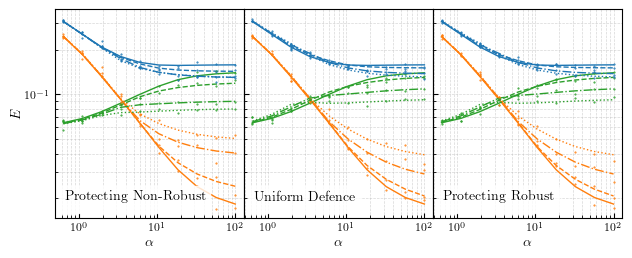

In [46]:
IMG_DIRECTORY = "./Assets/defence_sweep"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# width = 2.5 * 458.63788
multiplier = 1.25
width = multiplier * 1.5 * 234.8775

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=1.0, subplots=(1, 2))
tuple_size = (3*8.5/4,2.4)

multiplier = 1.25
second_multiplier = 0.6


# import Line2D for custom legend


fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    sharex=True,
    sharey=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.08)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.99)
fig.subplots_adjust(right=0.97)

print("Figure size in inches: ", fig.get_size_inches())

axes = axes.flatten()

# Create a custom legend
custom_legend = []


for dm_idx, data_model_name in enumerate(data_models):

    axs = axes[dm_idx]
    
    linestyles = ["solid", "dashed", "dashdot", "dotted", (0, (5, 10))]
    
    for idx, epsilon in enumerate(epsilons):

        df_filtered = df.filter(pl.col("data_model_name") == data_model_name, pl.col("epsilon") == epsilon)
        df_filtered = df_filtered.sort(by="alpha")        

        adversarial_error = df_filtered["adversarial_generalization_errors"]
        generalization_error = df_filtered["generalization_error"]
        boundary_error = adversarial_error - generalization_error

        adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
        generalization_error_erm = df_filtered["generalization_error_erm"]
        boundary_error_erm = adversarial_error_erm - generalization_error_erm

        adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
        generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
        boundary_error_erm_std = adversarial_error_erm_std - generalization_error_erm_std

        if dm_idx == 0:

            custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{adv}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{gen}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{bound}}}}, \varepsilon_t={}$".format(epsilon)))
        

        adversarial_lines = axs.plot(alphas, adversarial_error, linestyle=linestyles[idx],color="C0")
        axs.plot(alphas, generalization_error, linestyle=linestyles[idx],color="C1")
        axs.plot(alphas, boundary_error,linestyle=linestyles[idx], color="C2")

        axs.errorbar(
            alphas,
            adversarial_error_erm,
            yerr=adversarial_error_erm_std,
            fmt=".",
            markersize=1,
            color="C0"
        )
        axs.errorbar(
            alphas,
            generalization_error_erm,
            yerr=generalization_error_erm_std,
            fmt=".",
            markersize=1,
            color="C1"
        )
        axs.errorbar(
            alphas,
            boundary_error_erm,
            yerr=boundary_error_erm_std,
            fmt=".",
            markersize=1,
            color="C2"
        )


    axs.set_xscale("log")
    axs.set_yscale("log")


    if dm_idx == 0:
        axs.set_ylabel(r"$E$", labelpad=2.0)
    # axs.set_ylabel(r"$E$", labelpad=2.0)


    axs.set_xlabel(r"$\alpha$", labelpad=2.0)
    axs.grid(which="both", axis="both", alpha=0.5)
    axs.legend(title=map_data_model_name[data_model_name], loc="lower left")
    # Set the major ticks to face inwards
    axs.tick_params(axis='both', which='major', direction='in')

    # Set the minor ticks to face inwards
    axs.tick_params(axis='both', which='minor', direction='in')


error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = []

for idx in range(3):
    pass
    # custom_legend.append(error_legend[idx])
    # custom_legend.append(epsilon_legend[idx])

custom_legend.append(error_legend[-1])

# Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=4)

save = True
if save:
    save_plot(
        fig,
        "defence_sweep",
    )

plt.show()

Figure size in inches:  [0.6375 1.2   ]


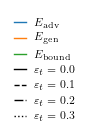

In [43]:
# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 0.1*tuple_size[0], 0.5*tuple_size[1]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

# display figure size
print("Figure size in inches: ", figlegend.get_size_inches())

error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
# error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 


# merge the two legends by concatenating the lists
custom_legend = error_legend + epsilon_legend


figlegend.legend(
    handles=custom_legend,
    handlelength=1,
    loc="center",
    ncol=1,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "vertical_legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()